In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from symbolic_control import IntegratorDynamics, Abstraction, Synthesis

## Configuration Parameters

Modify these cells to change the setup.

In [2]:
# ============================================================
# GRID PARAMETERS
# ============================================================
x_min, x_max = -5.0, 5.0    # Grid x bounds
y_min, y_max = -5.0, 5.0    # Grid y bounds
eta = 0.1                   # Cell size

# ============================================================
# DYNAMICS PARAMETERS
# ============================================================
tau = 0.5               # Time step
w_bound = 0.1               # Disturbance bound
u_values = np.linspace(-1, 1, num=6) # Control values per axis

In [3]:
# ============================================================
# OBSTACLES (as list of [x_min, x_max, y_min, y_max] regions)
# ============================================================
obstacle_regions = [
    [-1, 1, -1, 1],
    [-4, -2, 0, 2],  
    [-2.5, 0.5, 3, 4.5],
    [2, 4, -4, 1],
    [-1.5, 1.5, 1.5, 2.5],
    [1.5, 2.5,1, 2],
    [-4, -2, -4, -1],
    [-1, 1, -4, -2],
]

# ============================================================
# TARGET REGION [x_min, x_max, y_min, y_max]
# ============================================================
target_region = [2, 4, 2, 4]  # Top-right corner

# ============================================================
# START POSITION (for simulation)
# ============================================================
start_position = np.array([0, -1.5])

## Setup Dynamics and Abstraction

In [4]:
# Create dynamics
dynamics = IntegratorDynamics(tau=tau, w_bound=w_bound, u_values=u_values)
print(f"Control set: {len(dynamics.control_set)} controls")

# Create abstraction
abstraction = Abstraction(
    dynamics=dynamics,
    state_bounds=np.array([[x_min, x_max], [y_min, y_max]]),
    eta=eta
)
nx, ny = abstraction.grid_shape
print(f"\nGrid: {nx} x {ny} = {abstraction.num_cells} cells")

# Build transitions
print("\nBuilding transitions...")
abstraction.build_transitions()
print(f"Total transitions: {len(abstraction.transitions)}")

Control set: 36 controls

Grid: 100 x 100 = 10000 cells

Building transitions...
Building transitions for 10000 cells × 36 controls...
Done. Total transitions: 360000
Total transitions: 360000


## Define Obstacles and Target

In [5]:
def region_to_cells(abstraction, region):
    """Convert a region [x_min, x_max, y_min, y_max] to cell indices."""
    rx_min, rx_max, ry_min, ry_max = region
    cells = set()
    nx, ny = abstraction.grid_shape
    for i in range(nx):
        for j in range(ny):
            # Cell center
            cx = abstraction.state_bounds[0, 0] + (i + 0.5) * abstraction.eta
            cy = abstraction.state_bounds[1, 0] + (j + 0.5) * abstraction.eta
            if rx_min <= cx < rx_max and ry_min <= cy < ry_max:
                cell_idx = np.ravel_multi_index((i, j), abstraction.grid_shape)
                cells.add(cell_idx)
    return cells

# Convert obstacle regions to cells
obstacles = set()
for region in obstacle_regions:
    obstacles |= region_to_cells(abstraction, region)
print(f"Obstacle cells: {len(obstacles)}")

# Convert target region to cells
target = region_to_cells(abstraction, target_region)
print(f"Target cells: {len(target)}")
print(f"Target cell indices: {sorted(target)}")

Obstacle cells: 3650
Target cells: 400
Target cell indices: [7070, 7071, 7072, 7073, 7074, 7075, 7076, 7077, 7078, 7079, 7080, 7081, 7082, 7083, 7084, 7085, 7086, 7087, 7088, 7089, 7170, 7171, 7172, 7173, 7174, 7175, 7176, 7177, 7178, 7179, 7180, 7181, 7182, 7183, 7184, 7185, 7186, 7187, 7188, 7189, 7270, 7271, 7272, 7273, 7274, 7275, 7276, 7277, 7278, 7279, 7280, 7281, 7282, 7283, 7284, 7285, 7286, 7287, 7288, 7289, 7370, 7371, 7372, 7373, 7374, 7375, 7376, 7377, 7378, 7379, 7380, 7381, 7382, 7383, 7384, 7385, 7386, 7387, 7388, 7389, 7470, 7471, 7472, 7473, 7474, 7475, 7476, 7477, 7478, 7479, 7480, 7481, 7482, 7483, 7484, 7485, 7486, 7487, 7488, 7489, 7570, 7571, 7572, 7573, 7574, 7575, 7576, 7577, 7578, 7579, 7580, 7581, 7582, 7583, 7584, 7585, 7586, 7587, 7588, 7589, 7670, 7671, 7672, 7673, 7674, 7675, 7676, 7677, 7678, 7679, 7680, 7681, 7682, 7683, 7684, 7685, 7686, 7687, 7688, 7689, 7770, 7771, 7772, 7773, 7774, 7775, 7776, 7777, 7778, 7779, 7780, 7781, 7782, 7783, 7784, 7785, 778

## Run Synthesis Pipeline

In [6]:
# Create synthesis object and run
synth = Synthesis(abstraction, obstacles, target)
winning_set = synth.run(verbose=True)

SAFETY SYNTHESIS (Automaton Pruning)
Qₛ: 6350 cells | R₀: 6350 cells
Iteration 1: 6350 cells (removed 0)
Converged! S* = 6350 cells (63.5%)
Safe transitions: 153662
REACHABILITY SYNTHESIS
Target Qₐ: 400 cells
Safe target (Qₐ ∩ S*): 400 cells
R₀: 400 cells
Iteration 1: 748 cells (+348)
Iteration 2: 1177 cells (+429)
Iteration 3: 1495 cells (+318)
Iteration 4: 1620 cells (+125)
Iteration 5: 1700 cells (+80)
Iteration 6: 1780 cells (+80)
Iteration 7: 1860 cells (+80)
Iteration 8: 1940 cells (+80)
Iteration 9: 2024 cells (+84)
Iteration 10: 2120 cells (+96)
Iteration 11: 2240 cells (+120)
Iteration 12: 2392 cells (+152)
Iteration 13: 2588 cells (+196)
Iteration 14: 2830 cells (+242)
Iteration 15: 3050 cells (+220)
Iteration 16: 3314 cells (+264)
Iteration 17: 3662 cells (+348)
Iteration 18: 3954 cells (+292)
Iteration 19: 4162 cells (+208)
Iteration 20: 4416 cells (+254)
Iteration 21: 4676 cells (+260)
Iteration 22: 4948 cells (+272)
Iteration 23: 5228 cells (+280)
Iteration 24: 5496 cells

## Visualize Results

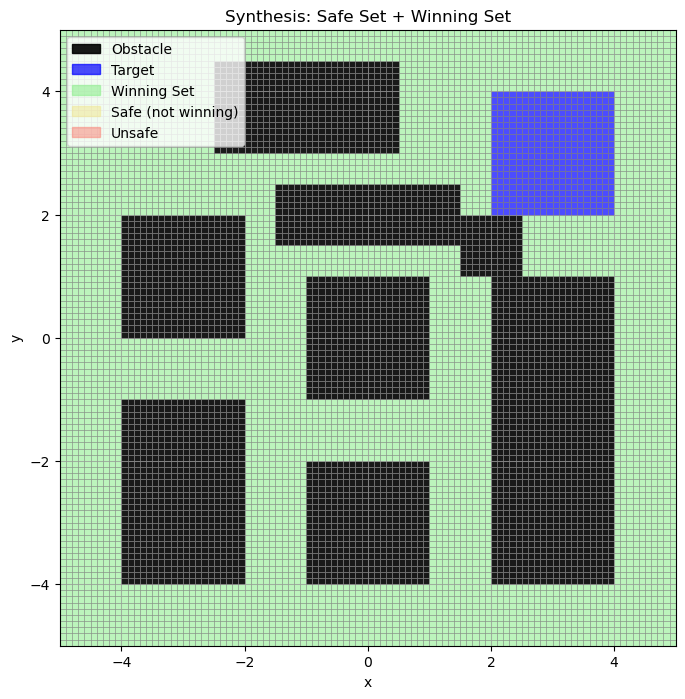

In [7]:
def visualize_synthesis(synth, ax=None, title="Synthesis Results"):
    """Visualize the synthesis results."""
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 8))
    
    abst = synth.abstraction
    nx, ny = abst.grid_shape
    
    # Draw cells
    for i in range(nx):
        for j in range(ny):
            cell_idx = np.ravel_multi_index((i, j), abst.grid_shape)
            x = abst.state_bounds[0, 0] + i * abst.eta
            y = abst.state_bounds[1, 0] + j * abst.eta
            
            # Determine color
            if cell_idx in synth.obstacles:
                color = 'black'
                alpha = 0.9
            elif cell_idx in synth.target:
                color = 'blue'
                alpha = 0.7
            elif synth.is_winning(cell_idx):
                color = 'lightgreen'
                alpha = 0.6
            elif synth.is_safe(cell_idx):
                color = 'khaki'
                alpha = 0.5
            else:
                color = 'salmon'
                alpha = 0.5
            
            rect = mpatches.Rectangle(
                (x, y), abst.eta, abst.eta,
                linewidth=0.5, edgecolor='gray',
                facecolor=color, alpha=alpha
            )
            ax.add_patch(rect)
    
    # Legend
    legend_patches = [
        mpatches.Patch(color='black', alpha=0.9, label='Obstacle'),
        mpatches.Patch(color='blue', alpha=0.7, label='Target'),
        mpatches.Patch(color='lightgreen', alpha=0.6, label='Winning Set'),
        mpatches.Patch(color='khaki', alpha=0.5, label='Safe (not winning)'),
        mpatches.Patch(color='salmon', alpha=0.5, label='Unsafe'),
    ]
    ax.legend(handles=legend_patches, loc='upper left')
    
    ax.set_xlim(abst.state_bounds[0, 0], abst.state_bounds[0, 1])
    ax.set_ylim(abst.state_bounds[1, 0], abst.state_bounds[1, 1])
    ax.set_aspect('equal')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(title)
    ax.grid(True, alpha=0.3)
    
    return ax

fig, ax = plt.subplots(figsize=(8, 8))
visualize_synthesis(synth, ax, title="Synthesis: Safe Set + Winning Set")
plt.show()

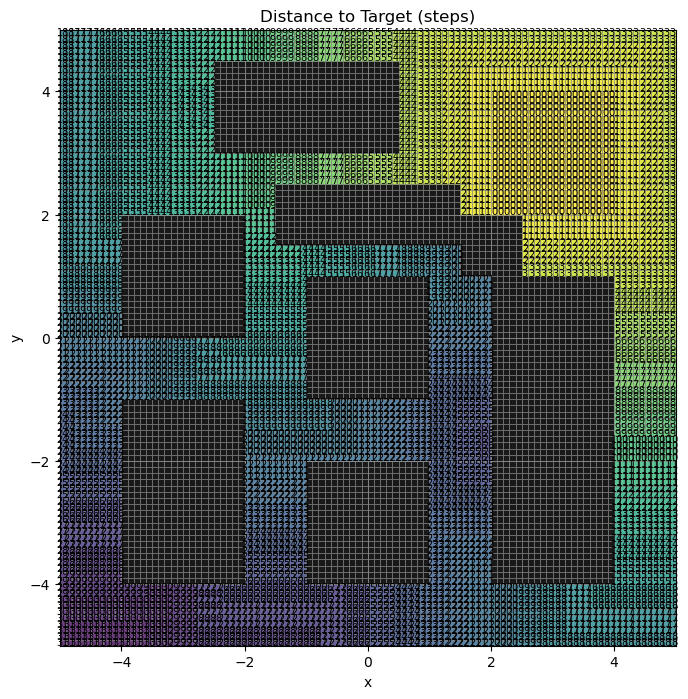

In [8]:
def visualize_distance_to_target(synth, ax=None):
    """Visualize distance to target (number of steps)."""
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 8))
    
    abst = synth.abstraction
    nx, ny = abst.grid_shape
    max_dist = len(synth.reach_sets) - 1
    
    for i in range(nx):
        for j in range(ny):
            cell_idx = np.ravel_multi_index((i, j), abst.grid_shape)
            x = abst.state_bounds[0, 0] + i * abst.eta
            y = abst.state_bounds[1, 0] + j * abst.eta
            
            if cell_idx in synth.obstacles:
                color = 'black'
                alpha = 0.9
            elif synth.is_winning(cell_idx):
                dist = synth.get_distance_to_target(cell_idx)
                # Color gradient: blue (0) -> green -> yellow (max_dist)
                if max_dist > 0:
                    ratio = dist / max_dist
                else:
                    ratio = 0
                color = plt.cm.viridis(1 - ratio)
                alpha = 0.8
            else:
                color = 'salmon'
                alpha = 0.5
            
            rect = mpatches.Rectangle(
                (x, y), abst.eta, abst.eta,
                linewidth=0.5, edgecolor='gray',
                facecolor=color, alpha=alpha
            )
            ax.add_patch(rect)
            
            # Add distance text
            if synth.is_winning(cell_idx):
                dist = synth.get_distance_to_target(cell_idx)
                ax.text(x + abst.eta/2, y + abst.eta/2, str(dist),
                       ha='center', va='center', fontsize=7)
    
    ax.set_xlim(abst.state_bounds[0, 0], abst.state_bounds[0, 1])
    ax.set_ylim(abst.state_bounds[1, 0], abst.state_bounds[1, 1])
    ax.set_aspect('equal')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Distance to Target (steps)')
    ax.grid(True, alpha=0.3)
    
    return ax

fig, ax = plt.subplots(figsize=(8, 8))
visualize_distance_to_target(synth, ax)
plt.show()

## Simulate Controller

In [9]:
def simulate(synth, start_pos, max_steps=50):
    """Simulate the controller from a starting position."""
    trajectory = [np.array(start_pos)]
    pos = np.array(start_pos)
    
    for step in range(max_steps):
        # Get current cell
        cell_idx = synth.abstraction.point_to_cell(pos)
        if cell_idx == -1:
            print(f"Step {step}: Out of bounds at {pos}")
            break
        
        # Check if at target
        if synth.is_at_target(cell_idx):
            print(f"Step {step}: Reached target at {pos} (cell {cell_idx})")
            break
        
        # Get control
        u_idx = synth.get_control(cell_idx)
        if u_idx is None:
            print(f"Step {step}: No control at cell {cell_idx} (not in winning set)")
            break
        
        u = synth.abstraction.dynamics.control_set[u_idx]
        
        # Apply dynamics with random disturbance
        w = np.random.uniform(-w_bound, w_bound, size=2)
        next_pos = synth.abstraction.dynamics.step(pos, u, w)
        
        trajectory.append(next_pos.copy())
        pos = next_pos
    
    return np.array(trajectory)

# Check if start is in winning set
start_cell = synth.abstraction.point_to_cell(start_position)
print(f"Start position: {start_position}")
print(f"Start cell: {start_cell}")
print(f"In winning set: {synth.is_winning(start_cell)}")
print(f"Distance to target: {synth.get_distance_to_target(start_cell)} steps")

Start position: [ 0.  -1.5]
Start cell: 5035
In winning set: True
Distance to target: 21 steps


In [10]:
# Run simulation
trajectory = simulate(synth, start_position, max_steps=30)
print(f"\nTrajectory length: {len(trajectory)} steps")

Step 19: Reached target at [2.46871156 3.51428931] (cell 7485)

Trajectory length: 20 steps


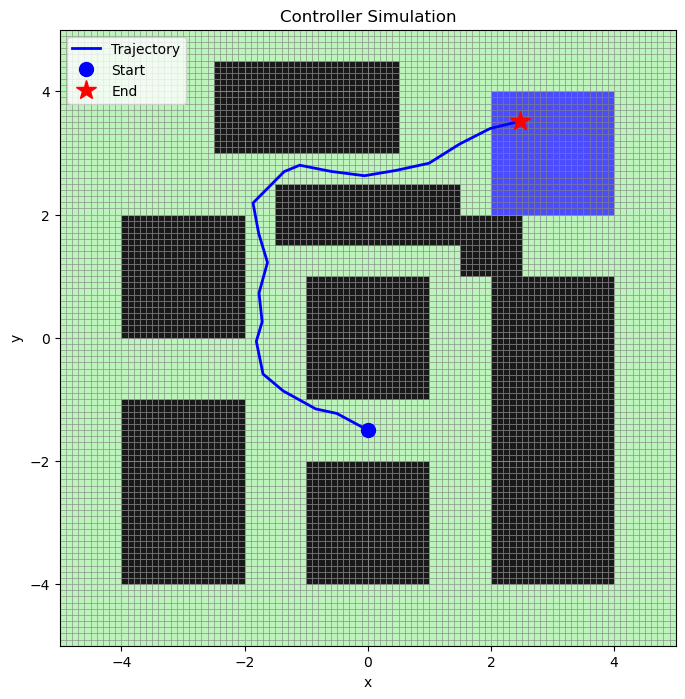

In [11]:
# Visualize trajectory
fig, ax = plt.subplots(figsize=(8, 8))
visualize_synthesis(synth, ax, title="Controller Simulation")

# Plot trajectory
ax.plot(trajectory[:, 0], trajectory[:, 1], 'b-', linewidth=2, label='Trajectory')
ax.plot(trajectory[0, 0], trajectory[0, 1], 'bo', markersize=10, label='Start')
ax.plot(trajectory[-1, 0], trajectory[-1, 1], 'r*', markersize=15, label='End')

ax.legend(loc='upper left')
plt.show()

## Summary Statistics

In [12]:
nx, ny = abstraction.grid_shape
print("=" * 50)
print("SYNTHESIS SUMMARY")
print("=" * 50)
print(f"Grid: {nx} x {ny} = {abstraction.num_cells} cells")
print(f"Cell size (eta): {eta}")
print(f"Time step (tau): {tau}")
print(f"Disturbance bound: {w_bound}")
print(f"")
print(f"Obstacles: {len(obstacles)} cells")
print(f"Target: {len(target)} cells")
print(f"")
print(f"Safe set (S*): {len(synth.safe_automaton.safe_states)} cells ({100*len(synth.safe_automaton.safe_states)/abstraction.num_cells:.1f}%)")
print(f"Winning set: {len(synth.winning_set)} cells ({100*len(synth.winning_set)/abstraction.num_cells:.1f}%)")
print(f"Reachability iterations: {len(synth.reach_sets) - 1}")
print(f"Max distance to target: {len(synth.reach_sets) - 1} steps")

SYNTHESIS SUMMARY
Grid: 100 x 100 = 10000 cells
Cell size (eta): 0.1
Time step (tau): 0.5
Disturbance bound: 0.1

Obstacles: 3650 cells
Target: 400 cells

Safe set (S*): 6350 cells (63.5%)
Winning set: 6350 cells (63.5%)
Reachability iterations: 32
Max distance to target: 32 steps
